# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key
target_url
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0
for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass
        
print("I made it through the gauntlet. The message survived!")


Processing record 1 of Set 1 | cabo san lucas
Processing record 2 of Set 1 | oriximina
Processing record 3 of Set 1 | georgetown
Processing record 4 of Set 1 | sibolga
Processing record 5 of Set 1 | saldanha
Processing record 6 of Set 1 | esperance
Processing record 7 of Set 1 | hofn
Processing record 8 of Set 1 | yellowknife
Processing record 9 of Set 1 | butaritari
Processing record 10 of Set 1 | kapaa
Record not found
Processing record 11 of Set 1 | rovaniemi
Processing record 12 of Set 1 | teahupoo
Processing record 13 of Set 1 | port alfred
Processing record 14 of Set 1 | rikitea
Record not found
Processing record 15 of Set 1 | dauriya
Processing record 16 of Set 1 | luderitz
Processing record 17 of Set 1 | riyadh
Processing record 18 of Set 1 | sangar
Processing record 19 of Set 1 | bambous virieux
Processing record 20 of Set 1 | nikolskoye
Processing record 21 of Set 1 | punta arenas
Processing record 22 of Set 1 | busselton
Processing record 23 of Set 1 | jamestown
Processing r

Processing record 189 of Set 1 | salalah
Processing record 190 of Set 1 | souillac
Processing record 191 of Set 1 | faranah
Processing record 192 of Set 1 | lodja
Processing record 193 of Set 1 | bandar-e lengeh
Processing record 194 of Set 1 | amazar
Record not found
Processing record 195 of Set 1 | kruisfontein
Processing record 196 of Set 1 | hamilton
Processing record 197 of Set 1 | pietersburg
Processing record 198 of Set 1 | dakar
Processing record 199 of Set 1 | andros town
Processing record 200 of Set 1 | siniscola
Processing record 201 of Set 1 | arica
Processing record 202 of Set 1 | yarmouth
Record not found
Processing record 203 of Set 1 | geraldton
Processing record 204 of Set 1 | san jeronimo
Processing record 205 of Set 1 | saint-francois
Processing record 206 of Set 1 | melur
Processing record 207 of Set 1 | hirara
Processing record 208 of Set 1 | saint george
Processing record 209 of Set 1 | lichinga
Processing record 210 of Set 1 | kirakira
Processing record 211 of Se

Processing record 379 of Set 1 | aosta
Processing record 380 of Set 1 | kununurra
Processing record 381 of Set 1 | lake havasu city
Processing record 382 of Set 1 | ngunguru
Processing record 383 of Set 1 | portland
Processing record 384 of Set 1 | bethel
Processing record 385 of Set 1 | batouri
Processing record 386 of Set 1 | nurota
Processing record 387 of Set 1 | tubuala
Processing record 388 of Set 1 | kimbe
Record not found
Processing record 389 of Set 1 | ladnun
Processing record 390 of Set 1 | mount gambier
Processing record 391 of Set 1 | jashpurnagar
Processing record 392 of Set 1 | saint-pierre
Processing record 393 of Set 1 | huilong
Processing record 394 of Set 1 | yenagoa
Processing record 395 of Set 1 | mweka
Processing record 396 of Set 1 | opuwo
Processing record 397 of Set 1 | kasempa
Processing record 398 of Set 1 | karla
Processing record 399 of Set 1 | miles city
Processing record 400 of Set 1 | santo amaro da imperatriz
Processing record 401 of Set 1 | tabou
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
weather_dict = {"City": cityname,"Latitude": lat, "Longitude":lng,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()


559

In [29]:
weather_data.to_csv(r'output_data\my_weather_data.csv')
# Show Record Count
countforme = len(weather_data)
countforme

559

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

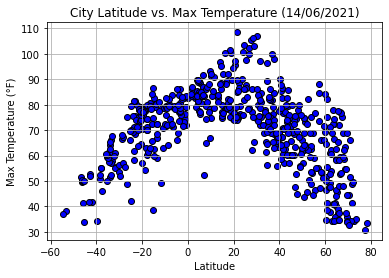

In [36]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], facecolors="blue", marker="o", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (14/06/2021)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./output_data/City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

## Latitude vs. Humidity Plot

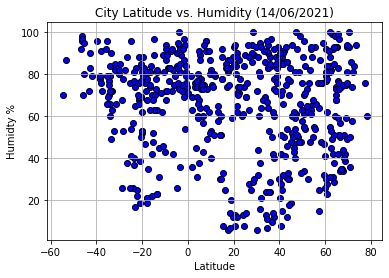

In [37]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="blue", marker="o", edgecolor="black")
plt.title("City Latitude vs. Humidity (14/06/2021)")
plt.ylabel("Humidty %")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./output_data/Latitude_vs_Humidity.png")

# Show Plot
plt.show()

## Latitude vs. Cloudiness Plot

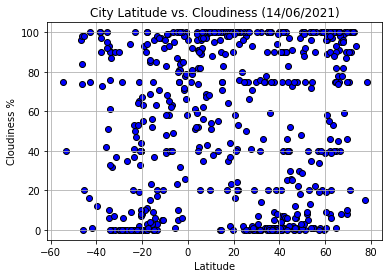

In [38]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")
plt.title("City Latitude vs. Cloudiness (14/06/2021)")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./output_data/Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

## Latitude vs. Wind Speed Plot

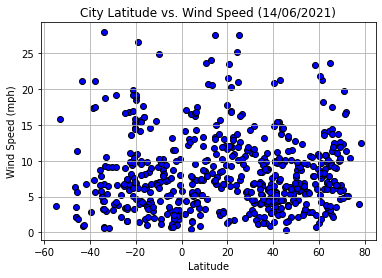

In [39]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="blue", marker="o", edgecolor="black")
plt.title("City Latitude vs. Wind Speed (14/06/2021)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./output_data/Latitude_vs_Wind Speed.png")

# Show Plot
plt.show()

## Linear Regression

In [40]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()
northlat_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
southlat_df = weather_data.loc[weather_data["Latitude"] < 0,:]

northlat_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabo San Lucas,22.8909,-109.9124,76.33,78,100,1.77,MX,1623661200
2,George Town,5.4112,100.3354,88.63,64,20,5.37,MY,1623661200
3,Sibolga,1.7427,98.7792,86.11,69,92,4.43,ID,1623661200
6,Hofn,64.2539,-15.2082,41.40,60,75,14.16,IS,1623661200
7,Yellowknife,62.4560,-114.3525,54.12,82,20,7.96,CA,1623661200


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7143566930647817


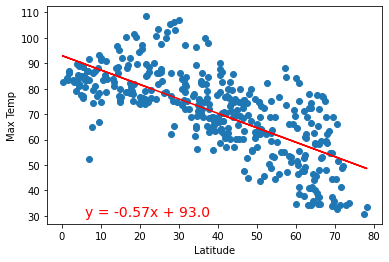

<Figure size 432x288 with 0 Axes>

In [41]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('northerntemplat')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7501384037586282


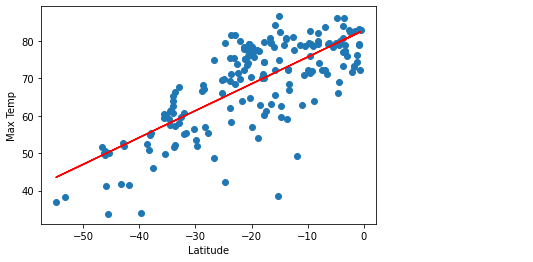

<Figure size 432x288 with 0 Axes>

In [44]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('southerntemplat')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.009178384825326801


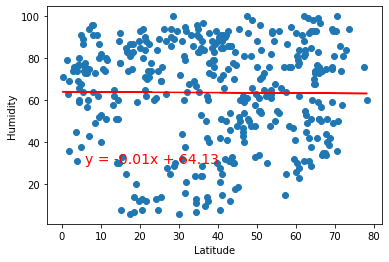

<Figure size 432x288 with 0 Axes>

In [45]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('northernhumlat')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.03079858627050097


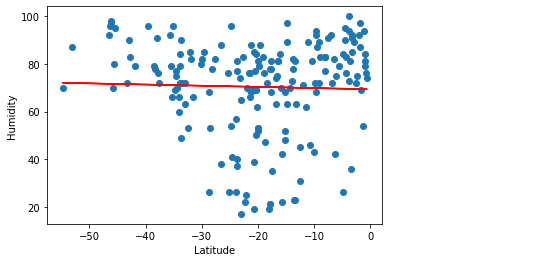

<Figure size 432x288 with 0 Axes>

In [46]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('southernhumlat')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.05105477428036811


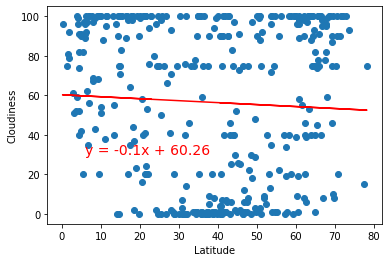

<Figure size 432x288 with 0 Axes>

In [47]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('northerncloudlat')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10757423766628625


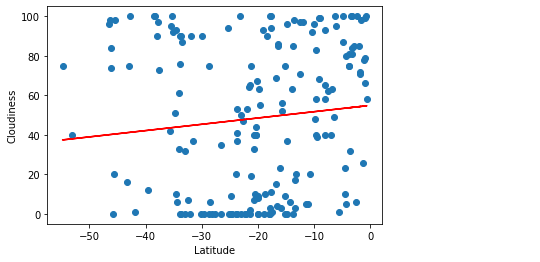

<Figure size 432x288 with 0 Axes>

In [48]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('southerncloudlat')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.07102122861345724


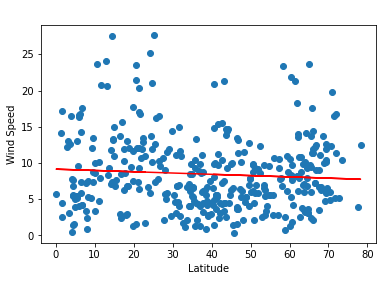

<Figure size 432x288 with 0 Axes>

In [49]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('northernwindlat')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.10316011531663727


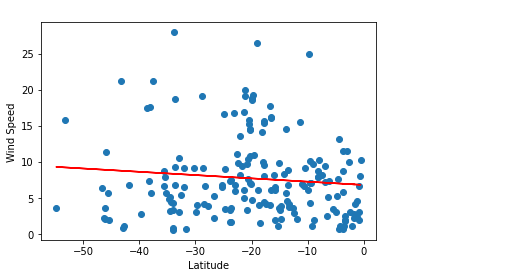

<Figure size 432x288 with 0 Axes>

In [50]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('southernwindlat')